Nolan Roth <br>
PHYS 434 AC <br>
Lab #1

In [41]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)

The Normal Distribution

The normal distribution is a bell-shaped curve that is common in statistics. The normal distribution has
two defining values associated with it: the mean, or $\mu$, and standard deviation, or $\sigma$. The mean determines where the 
center of the 'bell' is located and the standard deviation determines how spread out the 'bell' is from
its mean. A standard normal distribution is a normal distribution with mean $\mu$ = 0 and standard deviation $\sigma$ = 1.

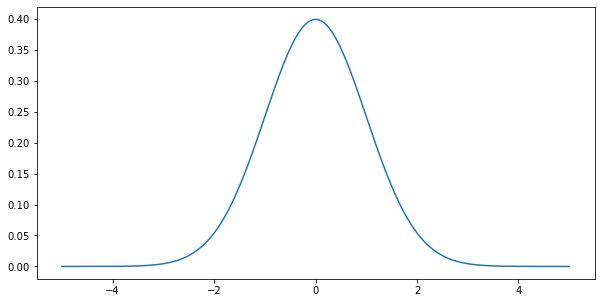

In [40]:
mu = 0                                     # mu is the mean of the distribution
sd = 1                                     # sd here is the standard deviation
x = np.linspace(-5.0, 5.0, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sd))     # plotting the standard normal distribution
plt.show()

The distance of a value from the mean $\mu$ can be expressed in term of $\sigma$. We can integrate under the curve of the standard normal distribution from the mean to a value of $\sigma$ to find the probability that a random value will lie between the mean and that value of $\sigma$. 

In [37]:
sigma_values = [1, 1.8, 3, 3.6]                  # some sample values of sigma 
probabilities = stats.norm.cdf(sigma_values)     # calculating probabilities from sigma values 
print('Probabilities = ')       
print(probabilities)                      

Probabilities = 
[0.84134475 0.96406968 0.9986501  0.99984089]


This tells us the probabilites of finding random values between the mean and $\sigma$, 1.8$\sigma$, 3$\sigma$, and 3.6$\sigma$. We can also do the inverse, starting with a probility and using the probability density funtion to find a value for $\sigma$ that would give us that probability. These probabilities match the values from a one-tailed z-score table.

In [42]:
sigma_values = stats.norm.ppf(probabilities)     # calculating sigma values from probabilities
print('Sigmas = ')
print(sigma_values)

Sigmas = 
[1.  1.8 3.  3.6]


This tells us the $\sigma$ values that would correspond to the probabilites above.

The Lognormal Distribution

A variable x is lognormally distributed if log(x) is normally distributed. Like the normal distribution, the lognormal distribution also has a mean $\mu$ and standard deviation $\sigma$ that defines the shape of its curve. Shown below is an analytic lognormal curve compared to a probability density distribution of 100k random samples distributed lognormally.

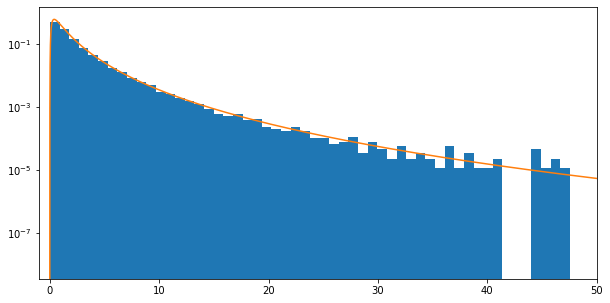

In [206]:
x = np.linspace(0, 100, 100000)
d = stats.lognorm.rvs(loc = 0, s = 1, scale = 1.1, size = 100000)
ax = plt.hist(d, 100, density='True')          # plotting probability density of random samples
plt.xlim([-1, 50])
plt.plot(x, stats.lognorm.pdf(x, s=1, loc = 0, scale = 1.1))  # plotting analytic lognormal pdf
matplotlib.pyplot.yscale('log')
plt.show()

Signal-Free Data Following Lognormal Distribution

For my hypothetical measurement, I want to find the probability that the signal-free data following a lognormal distribution will have a value less than or equal to 4 at a random time. To do this, I would integrate the lognormal probability density function from 0 to 4.

In [216]:
probability = stats.lognorm.cdf(4, s = 1, loc = 0, scale = 1)     # integrating the pdf
print('Probability = ')
print(probability)

Probability = 
0.9171714809983016


So the probability of measuring a random value of the signal to be less than or equal to 4 is 91.717%. 

In [221]:
sigma = stats.norm.ppf(probability)
print('Sigma = ')
print(sigma)

Sigma = 
1.386294361119891


This is approximately 4, so the equivalent sigma is value for the probability is 4$\sigma$.

Trying other measurement values 1, 1.8, 3, 5.6:

In [222]:
values = [1, 1.8, 3, 5.6]
probabilities = stats.lognorm.cdf(values, s = 1, loc = 0, scale = 1)     # integrating the pdf
print('Probabilities = ')
print(probabilities)
sigmas = stats.norm.ppf(probabilities)
print('Sigmas = ')
print(sigmas)

Probabilities = 
[0.5        0.72166225 0.86403139 0.95753463]
Sigmas = 
[0.         0.58778666 1.09861229 1.7227666 ]


The resulting probabilities are 50%, 72.17%, 86.40%, and 95.75%, with sigma values of 0$\sigma$, 0.588$\sigma$, 1.099$\sigma$, and 1.723$\sigma$.

A trend I notice is that the value of sigma seems to increase more rapidly with a change in the measurement value the nearer it is to 1. Changing the measurement value from 1 to 1.8, increases the sigma value from 0$\sigma$ to 0.588$\sigma$, while changing from 3 to 5.6 only increases the sigma value from 1.099$\sigma$ to 1.723$\sigma$. So a changing the target measurement by 0.8 near 1 increases the sigma value by 0.588$\sigma$, while changing the target measurement by 1.4 farther from 1 increases the sigma value by 0.624$\sigma$. 

The Piosson Distribution

The Piosson distribution is a discrete probability distribution expressing the probability that a specified number of events will occur over a specified time interval if the events occur with a constant mean rate and events occur independently of the time since the last event.

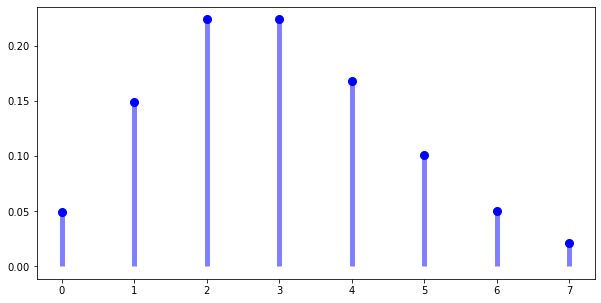

In [258]:
mu = 3
x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

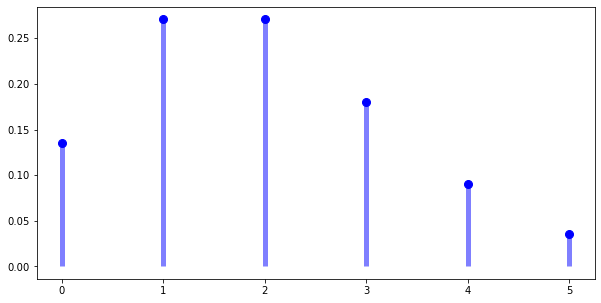

In [260]:
mu = 2
x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

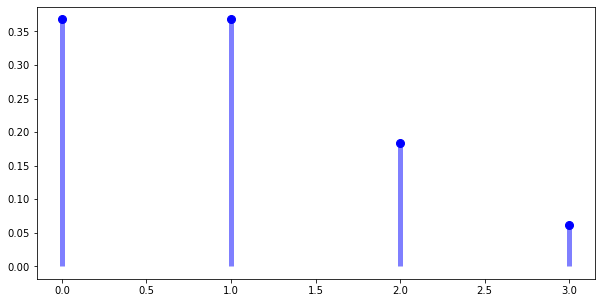

In [261]:
mu = 1
x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()